# VIIRS MODIS Comparison

In [1]:
# imports
import seaborn as sns
from matplotlib import pyplot as plt
import xarray
import h5py 
import pandas as pd

from ulmo import io as ulmo_io
from ulmo.plotting import plotting

# imports
from importlib import reload

from ulmo import io as ulmo_io
import numpy as np
from ulmo import io as ulmo_io
from ulmo.viirs import io as viirs_io
from ulmo.viirs import extract as viirs_extract
from ulmo.plotting import plotting
from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

sns.set_style('whitegrid')
sns.set_context('notebook')
pal, cm = plotting.load_palette()

## VIIRS 2013

In [2]:
viirs_tbl = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2013_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2013_std.parquet


In [10]:
x = range(-180,180+1)
y = range(-90,90+1)

alist = [[(i,j) for j in y] for i in x]

### Means

In [147]:
#plt.figure(figsize = [60.4, 30.8])
lonlist = []
latlist = []
for i in range(0,len(x)+1,180):
    for j in range(0,len(y)+1,90):
        #plt.plot(alist[i][j][0],alist[i][j][1],'o')
        lonlist.append(alist[i][j][0])
        latlist.append(alist[i][j][1])
#plt.show()

for i, j in zip(lonlist, latlist):
        lats = ((viirs_tbl.lat) > i) & ((viirs_tbl.lat) < i+1)
        lons = ((viirs_tbl.lon) > j) & ((viirs_tbl.lon) < j+1)    
        tbl.append(viirs_tbl[lats & lons])


for k in range(0,len(latlist)):
    llmean.append(np.mean(tbl[k].LL))
    dtmean.append(np.mean(tbl[k].Tmax-tbl[k].Tmin))
#print(lonlist)
#print(latlist)
#print(alist)
#print(len(lonlist))
#print(lonlist)
#print(llmean)

In [23]:
lonlist = []
latlist = []
for i in range(0,int(len(x)),1):
    for j in range(0,int(len(y)),1):
        #plt.plot(alist[i][j][0],alist[i][j][1],'o')
        lonlist.append(alist[i][j][0])
        latlist.append(alist[i][j][1])

In [22]:
lat = []
lon = []

tbl = []
llmean = []
dtmean = []

lonlist = []
latlist = []
for i in range(0,int(len(x)),1):
    for j in range(0,int(len(y)),1):
        #plt.plot(alist[i][j][0],alist[i][j][1],'o')
        lonlist.append(alist[i][j][0])
        latlist.append(alist[i][j][1])

for i, j in zip(lonlist, latlist):
        lats = ((viirs_tbl.lat) > j) & ((viirs_tbl.lat) < j+1)
        lons = ((viirs_tbl.lon) > i) & ((viirs_tbl.lon) < i+1)    
        tbl.append(viirs_tbl[lats & lons])


for k in range(0,len(latlist)):
    llmean.append(np.mean(tbl[k].LL))
    dtmean.append(np.mean(tbl[k].Tmax-tbl[k].Tmin))

In [24]:
print(len(lons))
print(len(tbl))
#print(llmean)
#print(dtmean)
print(len(llmean))
print(len(dtmean))
#print(latlist)
#print(lonlist)
#tbl[1]
#print(lat)

1123978
65341
65341
65341


In [178]:
np.mean([180,90])

135.0

In [46]:
comp2013 = {'Lon': lonlist,
            'Lat': latlist,
            'LL_mean': llmean,
            'dt_mean': dtmean
        }

df = pd.DataFrame(comp2013, columns = ['Lat', 'Lon','LL_mean','dt_mean'])

print (df)

       Lat  Lon  LL_mean  dt_mean
0      -90 -180      NaN      NaN
1      -89 -180      NaN      NaN
2      -88 -180      NaN      NaN
3      -87 -180      NaN      NaN
4      -86 -180      NaN      NaN
...    ...  ...      ...      ...
65336   86  180      NaN      NaN
65337   87  180      NaN      NaN
65338   88  180      NaN      NaN
65339   89  180      NaN      NaN
65340   90  180      NaN      NaN

[65341 rows x 4 columns]


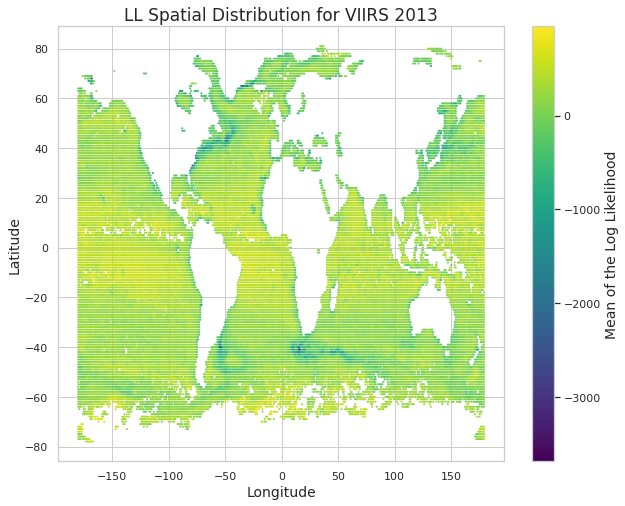

In [47]:
plt.figure(figsize = (10,8))
plt.scatter(df.Lon, df.Lat ,c=df.LL_mean, cmap = 'viridis', s=1)
plt.colorbar().set_label('Mean of the Log Likelihood', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('LL Spatial Distribution for VIIRS 2013', fontsize=17)
plt.show()

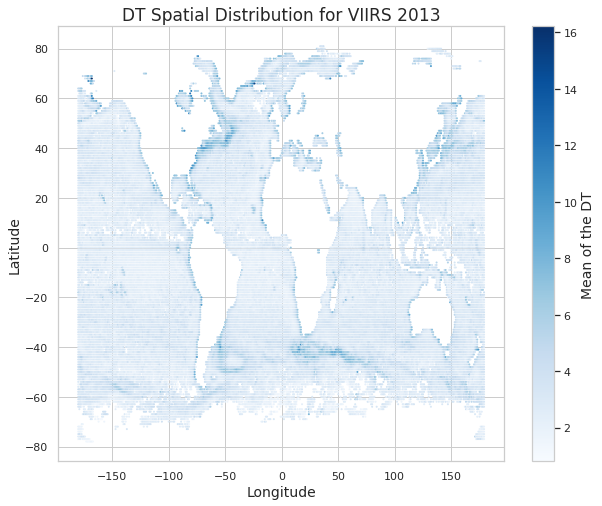

In [31]:
plt.figure(figsize = (10,8))
plt.scatter(df.Lon, df.Lat ,c=df.dt_mean, cmap = 'Blues', s=1)
plt.colorbar().set_label('Mean of the DT', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('DT Spatial Distribution for VIIRS 2013', fontsize=17)
plt.show()

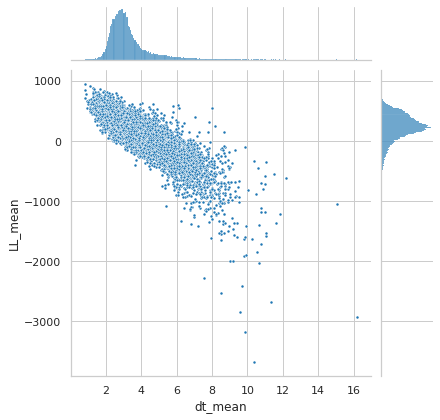

In [61]:
sns.jointplot(data=df,x='dt_mean',y='LL_mean',marker='.')

In [57]:
def plt_ex(extr):
    fig = plt.figure(figsize=(6,12))
    img = plt.imshow(extr, origin='lower', cmap=cm)#, vmin=-3)
    cb = plt.colorbar(img, fraction=0.020, pad=0.04)
    plt.show()

### Medians

In [71]:
lat = []
lon = []

tbl = []
llmedian = []
dtmedian = []

lonlist = []
latlist = []
for i in range(0,int(len(x)),1):
    for j in range(0,int(len(y)),1):
        #plt.plot(alist[i][j][0],alist[i][j][1],'o')
        lonlist.append(alist[i][j][0])
        latlist.append(alist[i][j][1])

for i, j in zip(lonlist, latlist):
        lats = ((viirs_tbl.lat) > j) & ((viirs_tbl.lat) < j+1)
        lons = ((viirs_tbl.lon) > i) & ((viirs_tbl.lon) < i+1)    
        tbl.append(viirs_tbl[lats & lons])


for k in range(0,len(latlist)):
    llmedian.append(np.median(tbl[k].LL))
    dtmedian.append(np.median(tbl[k].Tmax-tbl[k].Tmin))

/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [171]:
viirs2013 = {'Lon': lonlist,
            'Lat': latlist,
            'LL_median': llmedian,
            'dt_median': dtmedian
        }

df_med = pd.DataFrame(viirs2013, columns = ['Lat', 'Lon','LL_median','dt_median'])

print (df)

       Lat  Lon LL_median dt_median
0      -90 -180       NaN       NaN
1      -89 -180       NaN       NaN
2      -88 -180       NaN       NaN
3      -87 -180       NaN       NaN
4      -86 -180       NaN       NaN
...    ...  ...       ...       ...
65336   86  180       NaN       NaN
65337   87  180       NaN       NaN
65338   88  180       NaN       NaN
65339   89  180       NaN       NaN
65340   90  180       NaN       NaN

[65341 rows x 4 columns]


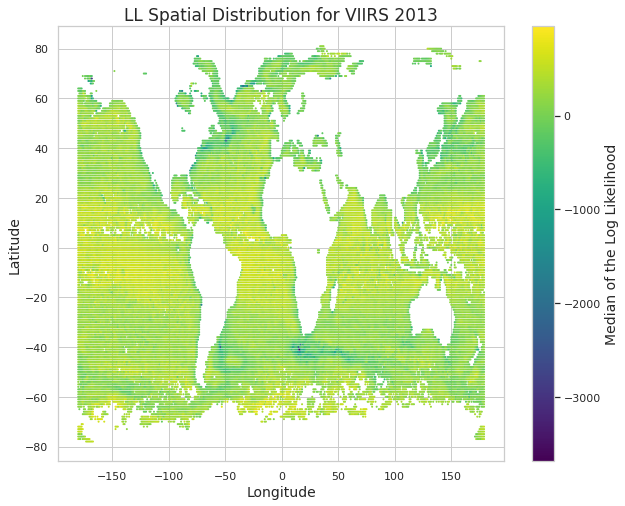

In [75]:
plt.figure(figsize = (10,8))
plt.scatter(df_med.Lon, df_med.Lat ,c=df_med.LL_median, cmap = 'viridis', s=1)
plt.colorbar().set_label('Median of the Log Likelihood', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('LL Spatial Distribution for VIIRS 2013', fontsize=17)
plt.show()

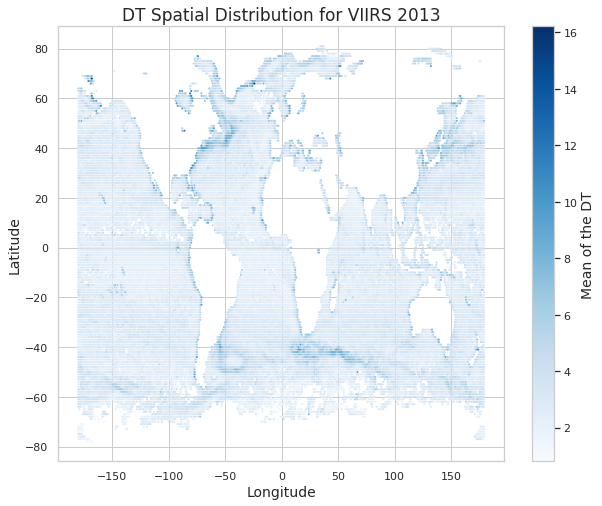

In [76]:
plt.figure(figsize = (10,8))
plt.scatter(df_med.Lon, df_med.Lat ,c=df_med.dt_median, cmap = 'Blues', s=1)
plt.colorbar().set_label('Mean of the DT', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('DT Spatial Distribution for VIIRS 2013', fontsize=17)
plt.show()

## Modis 2013

In [32]:
modis_tbl = ulmo_io.load_main_table('s3://modis-l2/Tables/MODIS_L2_std.parquet')
modis2013 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2013_95clear_128x128_preproc_std.h5')
modis_tbl13 = modis_tbl[modis2013[0][0]:modis2013[0][-1]]

Read main table: s3://modis-l2/Tables/MODIS_L2_std.parquet


In [33]:
modis_tbl13.head()

lat         lon  col            datetime          LL   row  \
7276284 -23.520683   95.750770  485 2013-10-02 18:50:00  -52.727173  1170   
7276285  16.851051 -102.057250  837 2013-12-14 08:40:00  283.585815  1040   
7276286 -35.825134   63.294304  773 2013-09-19 21:05:00  517.703552   368   
7276287  16.329021   58.524254  837 2013-04-09 22:00:00  524.822571   112   
7276288 -32.495373   34.305447  599 2013-11-04 22:55:00   21.168213   643   

         clear_fraction  mean_temperature       Tmin       Tmax        T90  \
7276284        0.049438         20.781815  18.490000  22.260000  21.244999   
7276285        0.013916         29.703894  28.039999  30.490000  30.074999   
7276286        0.034302         15.086960  14.445000  15.745000  15.309999   
7276287        0.002136         26.719688  25.205000  27.369999  27.000000   
7276288        0.049377         19.084999  17.580000  21.109999  20.395000   

               T10                              filename                  UID  \
7276284  20.244999  AQUA_MODIS.20131002T185008.L2.SST.nc   138066479327575077   
7276285  29.195000  AQUA_MODIS.20131214T084008.L2.SST.nc   138710685117794275   
7276286  14.785000  AQUA_MODIS.20130919T210509.L2.SST.nc   137954174924329430   
7276287  26.439999  AQUA_MODIS.20130409T220009.L2.SST.nc  1365106329023852425   
7276288  18.440001  AQUA_MODIS.20131104T225509.L2.SST.nc   138357504621430545   

                                                   pp_file   pp_root  \
7276284  s3://modis-l2/PreProc/MODIS_R2019_2013_95clear...  standard   
7276285  s3://modis-l2/PreProc/MODIS_R2019_2013_95clear...  standard   
7276286  s3://modis-l2/PreProc/MODIS_R2019_2013_95clear...  standard   
7276287  s3://modis-l2/PreProc/MODIS_R2019_2013_95clear...  standard   
7276288  s3://modis-l2/PreProc/MODIS_R2019_2013_95clear...  standard   

         field_size  pp_type  pp_idx  
7276284         128        0       0  
7276285         128        0       1  
7276286         128        0       2  
7276287         128        0       3  
7276288         128        0       4

### Means 

In [41]:
lat_m = []
lon_m = []

tbl_m = []
llmean_m = []
dtmean_m = []

lonlist_m = []
latlist_m = []
for i in range(0,int(len(x)),1):
    for j in range(0,int(len(y)),1):
        #plt.plot(alist[i][j][0],alist[i][j][1],'o')
        lonlist_m.append(alist[i][j][0])
        latlist_m.append(alist[i][j][1])

for i, j in zip(lonlist_m, latlist_m):
        lats = ((modis_tbl13.lat) > j) & ((modis_tbl13.lat) < j+1)
        lons = ((modis_tbl13.lon) > i) & ((modis_tbl13.lon) < i+1)    
        tbl_m.append(modis_tbl13[lats & lons])

for k in range(0,len(latlist_m)):
    llmean_m.append(np.mean(tbl_m[k].LL))
    dtmean_m.append(np.mean(tbl_m[k].Tmax-tbl_m[k].Tmin))

In [43]:
comp2013_m = {'Lon': lonlist_m,
            'Lat': latlist_m,
            'LL_mean': llmean_m,
            'dt_mean': dtmean_m
        }

df_m = pd.DataFrame(comp2013_m, columns = ['Lat', 'Lon','LL_mean','dt_mean'])

print (df_m)

       Lat  Lon  LL_mean  dt_mean
0      -90 -180      NaN      NaN
1      -89 -180      NaN      NaN
2      -88 -180      NaN      NaN
3      -87 -180      NaN      NaN
4      -86 -180      NaN      NaN
...    ...  ...      ...      ...
65336   86  180      NaN      NaN
65337   87  180      NaN      NaN
65338   88  180      NaN      NaN
65339   89  180      NaN      NaN
65340   90  180      NaN      NaN

[65341 rows x 4 columns]


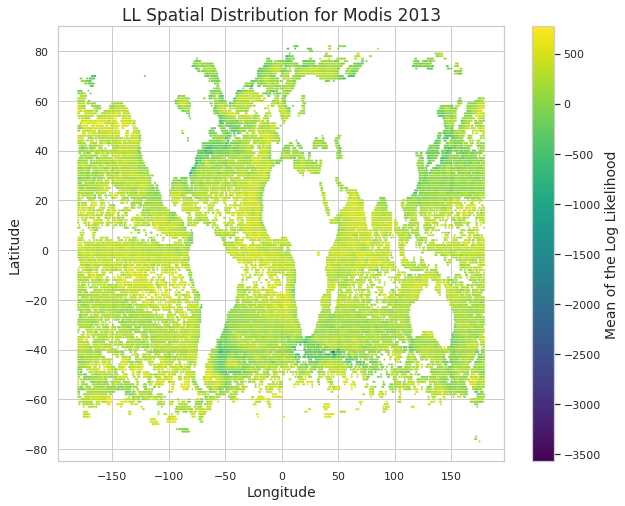

In [45]:
plt.figure(figsize = (10,8))
plt.scatter(df_m.Lon, df_m.Lat ,c=df_m.LL_mean, cmap = 'viridis', s=1)
plt.colorbar().set_label('Mean of the Log Likelihood', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('LL Spatial Distribution for Modis 2013', fontsize=17)
plt.show()

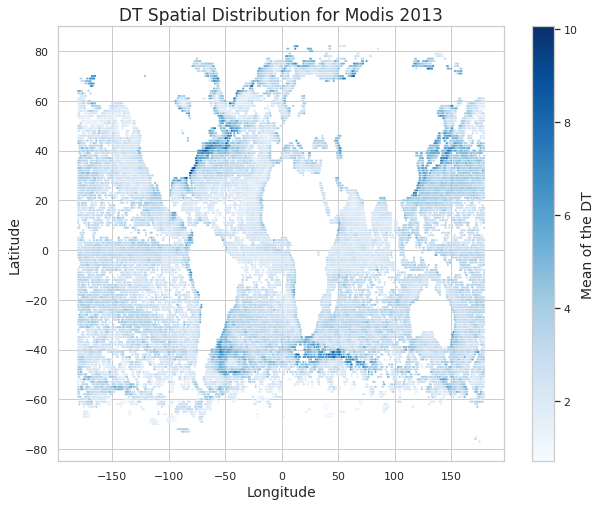

In [55]:
plt.figure(figsize = (10,8))
plt.scatter(df_m.Lon, df_m.Lat ,c=df_m.dt_mean, cmap = 'Blues', s=1)
plt.colorbar().set_label('Mean of the DT', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('DT Spatial Distribution for Modis 2013', fontsize=17)
plt.show()

### Medians

In [77]:
lat_m = []
lon_m = []

tbl_m = []
llmedian_m = []
dtmedian_m = []

lonlist_m = []
latlist_m = []
for i in range(0,int(len(x)),1):
    for j in range(0,int(len(y)),1):
        #plt.plot(alist[i][j][0],alist[i][j][1],'o')
        lonlist_m.append(alist[i][j][0])
        latlist_m.append(alist[i][j][1])

for i, j in zip(lonlist_m, latlist_m):
        lats = ((modis_tbl13.lat) > j) & ((modis_tbl13.lat) < j+1)
        lons = ((modis_tbl13.lon) > i) & ((modis_tbl13.lon) < i+1)    
        tbl_m.append(modis_tbl13[lats & lons])

for k in range(0,len(latlist_m)):
    llmedian_m.append(np.median(tbl_m[k].LL))
    dtmedian_m.append(np.median(tbl_m[k].Tmax-tbl_m[k].Tmin))

/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [78]:
modis2013_m = {'Lon': lonlist_m,
            'Lat': latlist_m,
            'LL_median': llmedian_m,
            'dt_median': dtmedian_m
        }

df_med_m = pd.DataFrame(modis2013_m, columns = ['Lat', 'Lon','LL_median','dt_median'])

print (df_m)

       Lat  Lon  LL_mean  dt_mean
0      -90 -180      NaN      NaN
1      -89 -180      NaN      NaN
2      -88 -180      NaN      NaN
3      -87 -180      NaN      NaN
4      -86 -180      NaN      NaN
...    ...  ...      ...      ...
65336   86  180      NaN      NaN
65337   87  180      NaN      NaN
65338   88  180      NaN      NaN
65339   89  180      NaN      NaN
65340   90  180      NaN      NaN

[65341 rows x 4 columns]


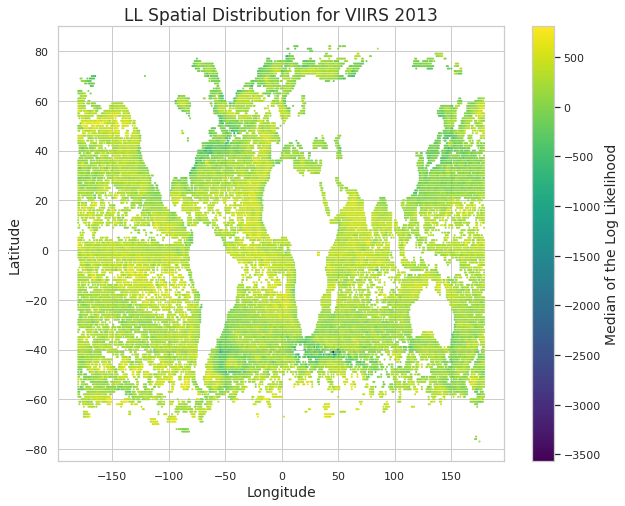

In [79]:
plt.figure(figsize = (10,8))
plt.scatter(df_med_m.Lon, df_med_m.Lat ,c=df_med_m.LL_median, cmap = 'viridis', s=1)
plt.colorbar().set_label('Median of the Log Likelihood', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('LL Spatial Distribution for VIIRS 2013', fontsize=17)
plt.show()

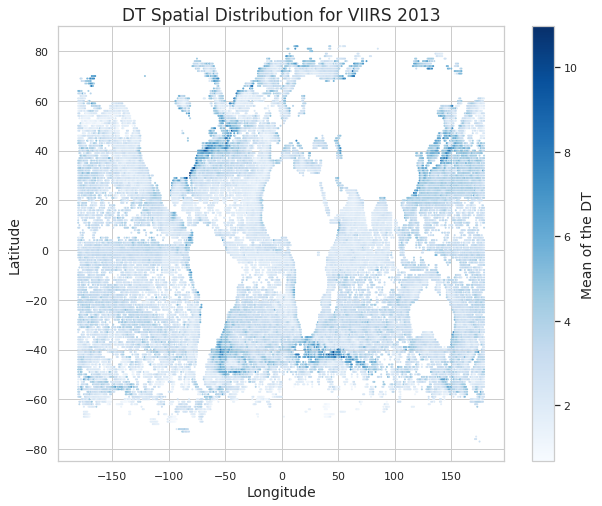

In [80]:
plt.figure(figsize = (10,8))
plt.scatter(df_med_m.Lon, df_med_m.Lat ,c=df_med_m.dt_median, cmap = 'Blues', s=1)
plt.colorbar().set_label('Mean of the DT', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('DT Spatial Distribution for VIIRS 2013', fontsize=17)
plt.show()

## 2013 Comparison

In [53]:
df.LL_mean - df_m.LL_mean

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
65336   NaN
65337   NaN
65338   NaN
65339   NaN
65340   NaN
Name: LL_mean, Length: 65341, dtype: float64

### Means

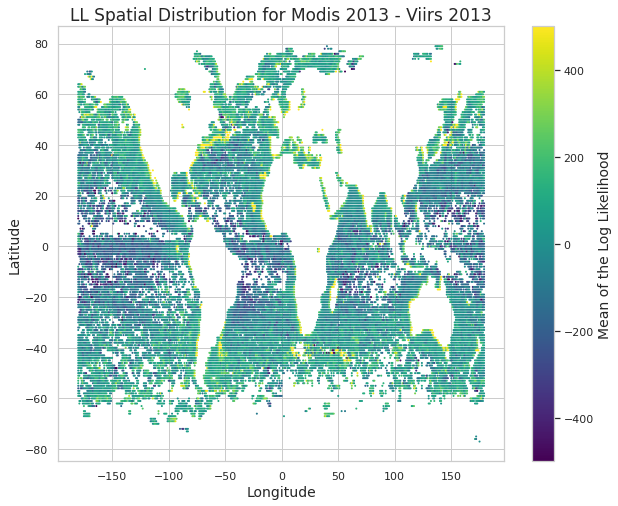

In [64]:
plt.figure(figsize = (10,8))
plt.scatter(df_m.Lon, df_m.Lat ,c=(df_m.LL_mean - df.LL_mean), cmap = 'viridis', s=1, vmin=-500,vmax=500)
plt.colorbar().set_label('Mean of the Log Likelihood', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('LL Spatial Distribution for Modis 2013 - Viirs 2013', fontsize=17)
plt.show()

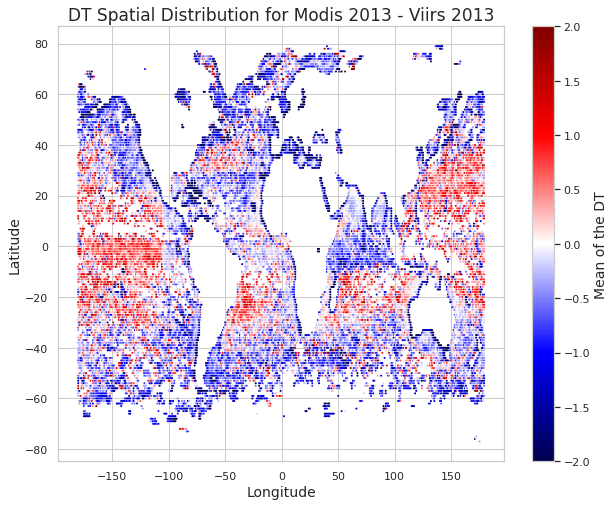

In [70]:
plt.figure(figsize = (10,8))
plt.scatter(df_m.Lon, df_m.Lat ,c=(df_m.dt_mean - df.dt_mean), cmap = 'seismic', s=1, vmin=-2,vmax=2)
plt.colorbar().set_label('Mean of the DT', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('DT Spatial Distribution for Modis 2013 - Viirs 2013', fontsize=17)
plt.show()

### Medians

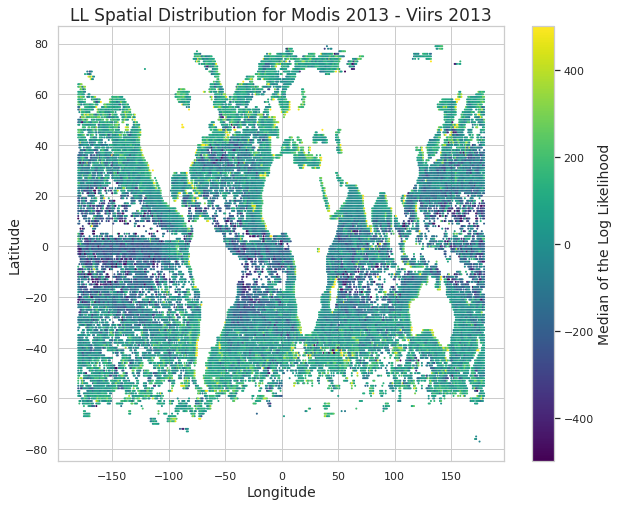

In [85]:
plt.figure(figsize = (10,8))
plt.scatter(df_med.Lon, df_med.Lat ,c=(df_med_m.LL_median - df_med.LL_median), cmap = 'viridis', s=1, vmin=-500,vmax=500)
plt.colorbar().set_label('Median of the Log Likelihood', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('LL Spatial Distribution for Modis 2013 - Viirs 2013', fontsize=17)
plt.show()

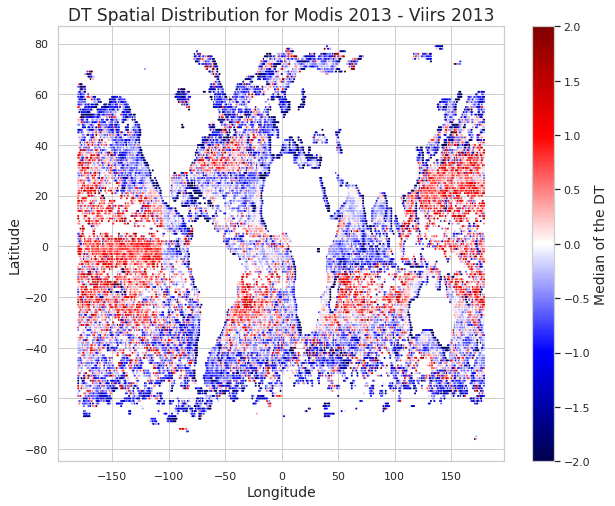

In [84]:
plt.figure(figsize = (10,8))
plt.scatter(df_med.Lon, df_med.Lat ,c=(df_med_m.dt_median - df_med.dt_median), cmap = 'seismic', s=1, vmin=-2,vmax=2)
plt.colorbar().set_label('Median of the DT', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('DT Spatial Distribution for Modis 2013 - Viirs 2013', fontsize=17)
plt.show()

## ALL MODIS Years 2003-2019

In [86]:
modis_tbl = ulmo_io.load_main_table('s3://modis-l2/Tables/MODIS_L2_std.parquet')

Read main table: s3://modis-l2/Tables/MODIS_L2_std.parquet


In [87]:
modis_tbl.head()

lat         lon   col            datetime          LL   row  \
0  13.980967   62.675774   517 2003-03-10 21:25:00  520.178711   304   
1  13.043748 -102.751816   706 2003-12-12 08:30:00  432.766724  1696   
2 -18.086618   40.844833   581 2003-09-24 22:35:00  764.413086   656   
3  39.071575   18.569141  1028 2003-05-01 01:05:00  371.310120   898   
4  17.901926   90.155480   997 2003-12-05 19:55:00 -214.759277  1520   

   clear_fraction  mean_temperature       Tmin       Tmax        T90  \
0        0.000000         26.199476  25.250000  26.885000  26.474998   
1        0.049805         28.924648  27.789999  29.654999  29.154999   
2        0.006104         25.551611  24.775000  26.154999  25.750000   
3        0.049988         16.414951  15.160000  17.205000  16.725000   
4        0.035461         26.744499  24.975000  28.724998  27.824999   

         T10                              filename                  UID  \
0  25.814999  AQUA_MODIS.20030310T212506.L2.SST.nc  1047103981024267577   
1  28.695000  AQUA_MODIS.20031212T083006.L2.SST.nc   107110304377724818   
2  25.344999  AQUA_MODIS.20030924T223506.L2.SST.nc   106471913422084483   
3  16.080000  AQUA_MODIS.20030501T010506.L2.SST.nc  1051129071619856914   
4  25.830000  AQUA_MODIS.20031205T195506.L2.SST.nc  1070107901927015548   

                                             pp_file   pp_root  field_size  \
0  s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...  standard         128   
1  s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...  standard         128   
2  s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...  standard         128   
3  s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...  standard         128   
4  s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...  standard         128   

   pp_type  pp_idx  
0        0       0  
1        0       1  
2        0       2  
3        0       3  
4        0       4

In [91]:
lat_mod = []
lon_mod = []

tbl_mod = []
llmean_mod = []
dtmean_mod = []
llmedian_mod = []
dtmedian_mod = []

lonlist_mod = []
latlist_mod = []
for i in range(0,int(len(x)),1):
    for j in range(0,int(len(y)),1):
        #plt.plot(alist[i][j][0],alist[i][j][1],'o')
        lonlist_mod.append(alist[i][j][0])
        latlist_mod.append(alist[i][j][1])

for i, j in zip(lonlist_mod, latlist_mod):
        lats = ((modis_tbl.lat) > j) & ((modis_tbl.lat) < j+1)
        lons = ((modis_tbl.lon) > i) & ((modis_tbl.lon) < i+1)    
        tbl_mod.append(modis_tbl[lats & lons])

for k in range(0,len(latlist_mod)):
    llmean_mod.append(np.mean(tbl_mod[k].LL))
    dtmean_mod.append(np.mean(tbl_mod[k].Tmax-tbl_mod[k].Tmin))
    llmedian_mod.append(np.median(tbl_mod[k].LL))
    dtmedian_mod.append(np.median(tbl_mod[k].Tmax-tbl_mod[k].Tmin))

/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [93]:
modisfull = {'Lon': lonlist_mod,
            'Lat': latlist_mod,
             'LL_mean': llmean_mod,
             'dt_mean': dtmean_mod,
            'LL_median': llmedian_mod,
            'dt_median': dtmedian_mod
        }

df_modis = pd.DataFrame(modisfull, columns = ['Lat', 'Lon','LL_mean','dt_mean','LL_median','dt_median'])

print (df_m)

       Lat  Lon  LL_mean  dt_mean
0      -90 -180      NaN      NaN
1      -89 -180      NaN      NaN
2      -88 -180      NaN      NaN
3      -87 -180      NaN      NaN
4      -86 -180      NaN      NaN
...    ...  ...      ...      ...
65336   86  180      NaN      NaN
65337   87  180      NaN      NaN
65338   88  180      NaN      NaN
65339   89  180      NaN      NaN
65340   90  180      NaN      NaN

[65341 rows x 4 columns]


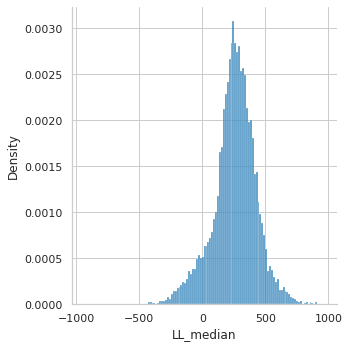

In [137]:
sns.displot(data=df_modis,x='LL_median',stat='density')

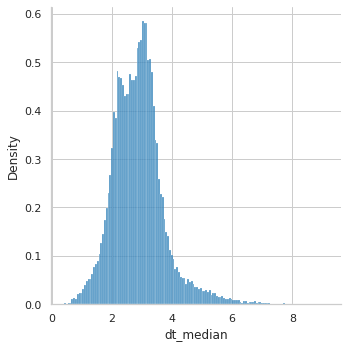

In [130]:
sns.displot(data=df_modis,x='dt_median',stat='density')

### Means

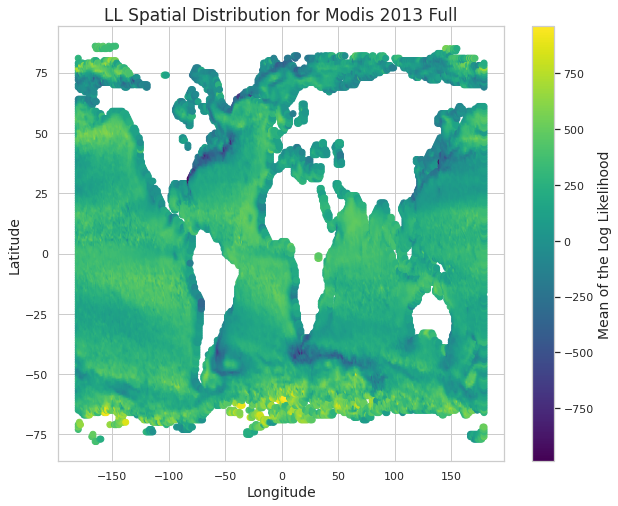

In [147]:
plt.figure(figsize = (10,8))
plt.scatter(df_modis.Lon, df_modis.Lat ,c=(df_modis.LL_mean), cmap = 'viridis')
plt.colorbar().set_label('Mean of the Log Likelihood', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('LL Spatial Distribution for Modis 2013 Full', fontsize=17)
plt.show()

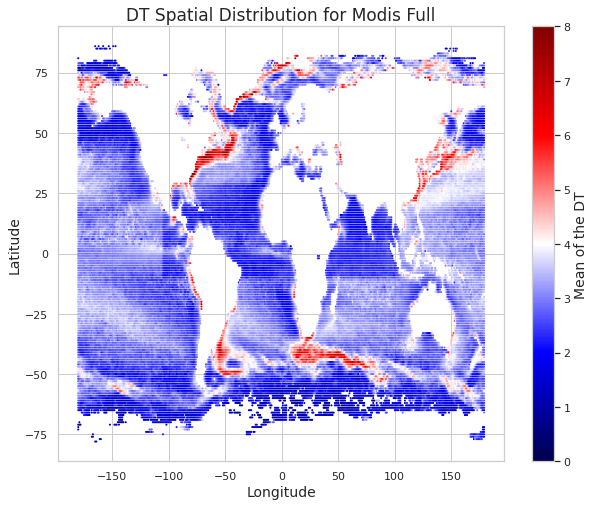

In [145]:
plt.figure(figsize = (10,8))
plt.scatter(df_modis.Lon, df_modis.Lat ,c=(df_modis.dt_mean), cmap = 'seismic', s=1, vmin=0,vmax=8)
plt.colorbar().set_label('Mean of the DT', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('DT Spatial Distribution for Modis Full', fontsize=17)
plt.show()

### Medians

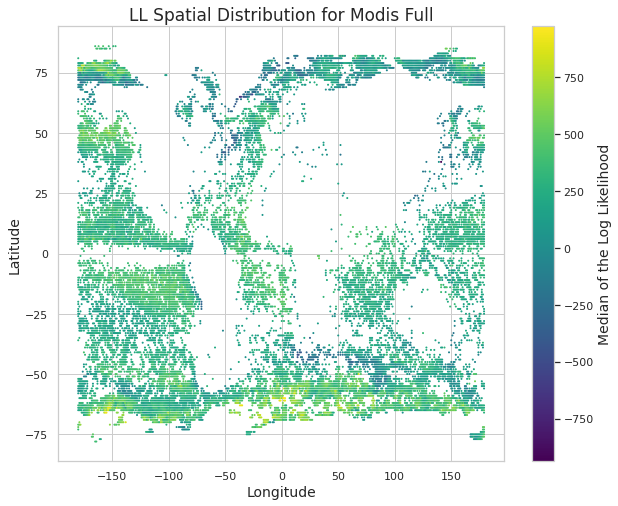

In [146]:
plt.figure(figsize = (10,8))
plt.scatter(df_modis.Lon, df_modis.Lat ,c=(df_modis.LL_median), cmap = 'viridis', s=1)
plt.colorbar().set_label('Median of the Log Likelihood', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('LL Spatial Distribution for Modis Full', fontsize=17)
plt.show()

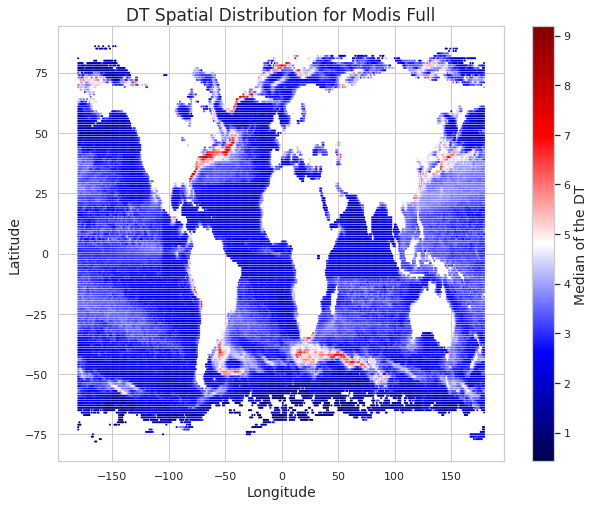

In [139]:
plt.figure(figsize = (10,8))
plt.scatter(df_modis.Lon, df_modis.Lat ,c=(df_modis.dt_median), cmap = 'seismic', s=1)
plt.colorbar().set_label('Median of the DT', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('DT Spatial Distribution for Modis Full', fontsize=17)
plt.show()

## All VIIRS Years 2012-2019

In [114]:
viirs_tbl12 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2012_std.parquet')
viirs_tbl13 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2013_std.parquet')
viirs_tbl14 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2014_std.parquet')
viirs_tbl15 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2015_std.parquet')
viirs_tbl16 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2016_std.parquet')
viirs_tbl17 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2017_std.parquet')
viirs_tbl18 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2018_std.parquet')
viirs_tbl19 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2019_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2012_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2013_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2014_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2015_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2016_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2017_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2018_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2019_std.parquet


In [151]:
list_viirs = [viirs_tbl12,viirs_tbl13,viirs_tbl14,viirs_tbl15,viirs_tbl16,viirs_tbl17,viirs_tbl18,viirs_tbl19]
lat_vir = []
lon_vir = []

tbl_vir = []
llmean_vir = []
dtmean_vir = []
llmedian_vir = []
dtmedian_vir = []

lonlist_vir = []
latlist_vir = []

for i in range(0,int(len(x)),1):
    for j in range(0,int(len(y)),1):
        #plt.plot(alist[i][j][0],alist[i][j][1],'o')
        lonlist_vir.append(alist[i][j][0])
        latlist_vir.append(alist[i][j][1])

for viirs_tbls in list_viirs:
    for i, j in zip(lonlist_vir, latlist_vir):
        lats = ((viirs_tbls.lat) > j) & ((viirs_tbls.lat) < j+1)
        lons = ((viirs_tbls.lon) > i) & ((viirs_tbls.lon) < i+1)    
        tbl_vir.append(viirs_tbls[lats & lons])

for k in range(0,len(latlist_vir)):
    llmean_vir.append(np.mean(tbl_vir[k].LL))
    dtmean_vir.append(np.mean(tbl_vir[k].Tmax-tbl_vir[k].Tmin))
    llmedian_vir.append(np.median(tbl_vir[k].LL))
    dtmedian_vir.append(np.median(tbl_vir[k].Tmax-tbl_vir[k].Tmin))

/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [152]:
viirsfull = {'Lon': lonlist_vir,
            'Lat': latlist_vir,
             'LL_mean': llmean_vir,
             'dt_mean': dtmean_vir,
            'LL_median': llmedian_vir,
            'dt_median': dtmedian_vir
        }

df_viirs = pd.DataFrame(viirsfull, columns = ['Lat', 'Lon','LL_mean','dt_mean','LL_median','dt_median'])

print (df_viirs)

       Lat  Lon  LL_mean  dt_mean  LL_median  dt_median
0      -90 -180      NaN      NaN        NaN        NaN
1      -89 -180      NaN      NaN        NaN        NaN
2      -88 -180      NaN      NaN        NaN        NaN
3      -87 -180      NaN      NaN        NaN        NaN
4      -86 -180      NaN      NaN        NaN        NaN
...    ...  ...      ...      ...        ...        ...
65336   86  180      NaN      NaN        NaN        NaN
65337   87  180      NaN      NaN        NaN        NaN
65338   88  180      NaN      NaN        NaN        NaN
65339   89  180      NaN      NaN        NaN        NaN
65340   90  180      NaN      NaN        NaN        NaN

[65341 rows x 6 columns]


### Means

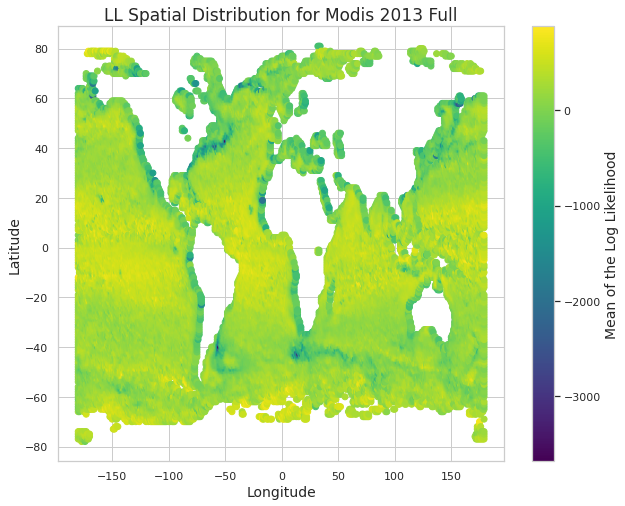

In [153]:
plt.figure(figsize = (10,8))
plt.scatter(df_viirs.Lon, df_viirs.Lat ,c=(df_viirs.LL_mean), cmap = 'viridis')
plt.colorbar().set_label('Mean of the Log Likelihood', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('LL Spatial Distribution for Modis 2013 Full', fontsize=17)
plt.show()

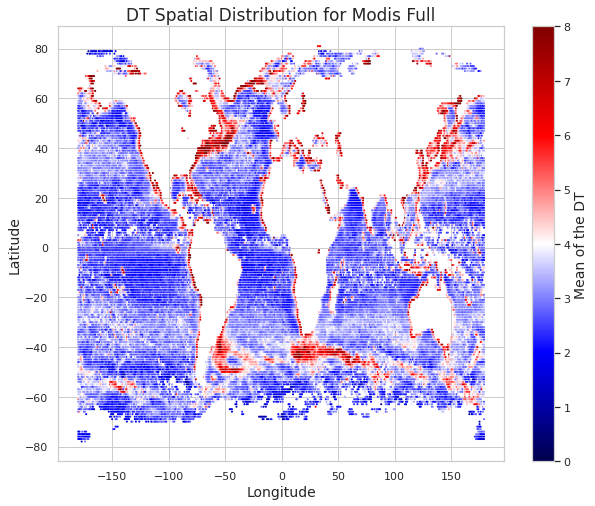

In [154]:
plt.figure(figsize = (10,8))
plt.scatter(df_viirs.Lon, df_viirs.Lat ,c=(df_viirs.dt_mean), cmap = 'seismic', s=1, vmin=0,vmax=8)
plt.colorbar().set_label('Mean of the DT', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('DT Spatial Distribution for Modis Full', fontsize=17)
plt.show()

### Medians

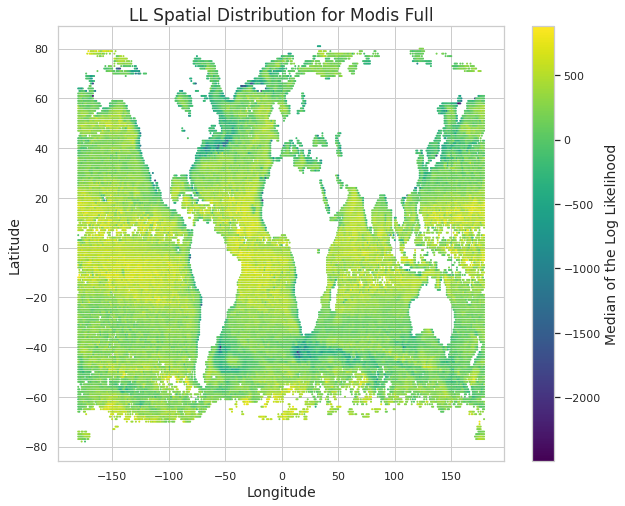

In [155]:
plt.figure(figsize = (10,8))
plt.scatter(df_viirs.Lon, df_viirs.Lat ,c=(df_viirs.LL_median), cmap = 'viridis', s=1)
plt.colorbar().set_label('Median of the Log Likelihood', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('LL Spatial Distribution for Modis Full', fontsize=17)
plt.show()

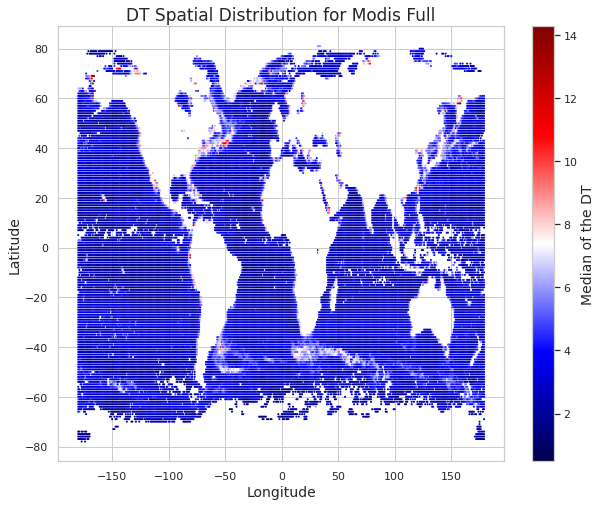

In [157]:
plt.figure(figsize = (10,8))
plt.scatter(df_viirs.Lon, df_viirs.Lat ,c=(df_viirs.dt_median), cmap = 'seismic', s=1)
plt.colorbar().set_label('Median of the DT', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('DT Spatial Distribution for Modis Full', fontsize=17)
plt.show()

## Difference Full Modis - Full VIIRS

### Medians

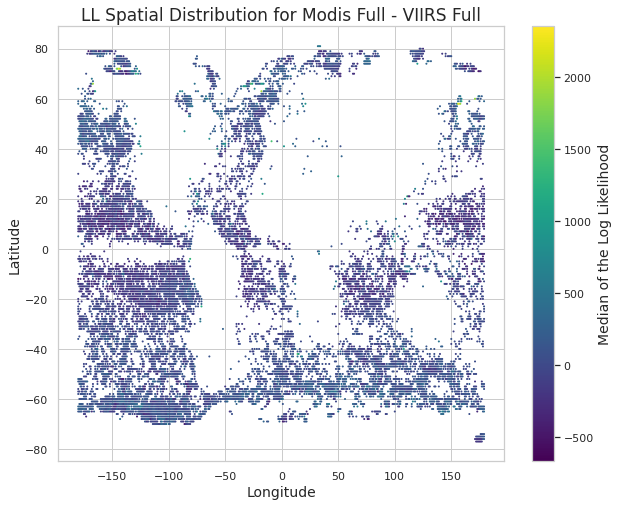

In [164]:
plt.figure(figsize = (10,8))
plt.scatter(df_viirs.Lon, df_viirs.Lat ,c=(df_modis.LL_median-df_viirs.LL_median), cmap = 'viridis', s=1)
plt.colorbar().set_label('Median of the Log Likelihood', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('LL Spatial Distribution for Modis Full - VIIRS Full', fontsize=17)
plt.show()

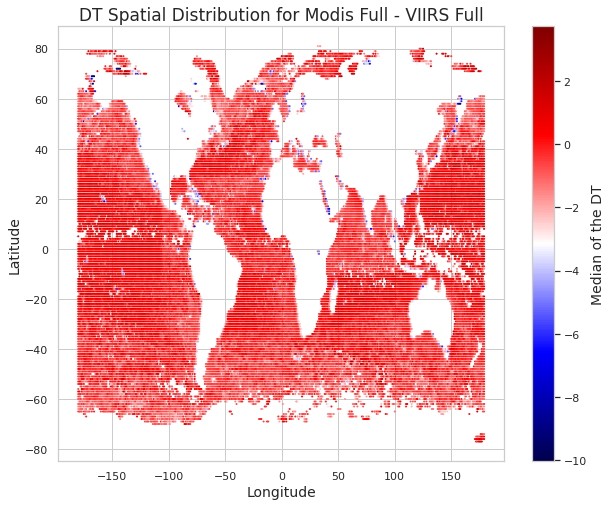

In [165]:
plt.figure(figsize = (10,8))
plt.scatter(df_viirs.Lon, df_viirs.Lat ,c=(df_modis.dt_median-df_viirs.dt_median), cmap = 'seismic', s=1)
plt.colorbar().set_label('Median of the DT', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('DT Spatial Distribution for Modis Full - VIIRS Full', fontsize=17)
plt.show()

## Differnce Full VIIRS - Full MODIS

### Medians

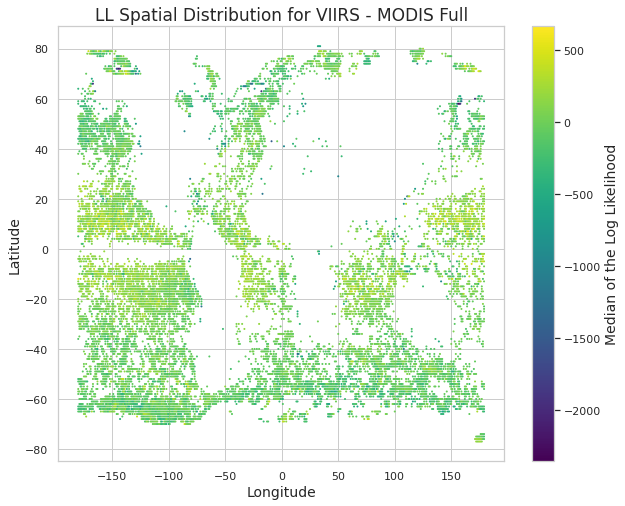

In [174]:
plt.figure(figsize = (10,8))
plt.scatter(df_viirs.Lon, df_viirs.Lat ,c=(df_viirs.LL_median-df_modis.LL_median), cmap = 'viridis', s=1)
plt.colorbar().set_label('Median of the Log Likelihood', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('LL Spatial Distribution for VIIRS - MODIS Full', fontsize=17)
plt.show()

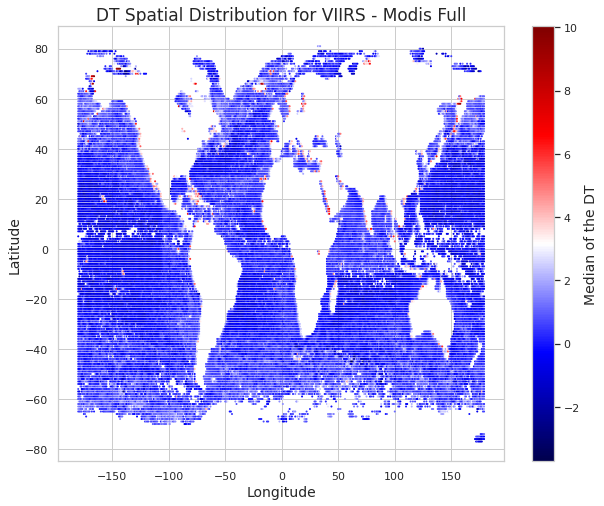

In [177]:
plt.figure(figsize = (10,8))
plt.scatter(df_viirs.Lon, df_viirs.Lat ,c=(df_viirs.dt_median-df_modis.dt_median), cmap = 'seismic', s=1)
plt.colorbar().set_label('Median of the DT', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('DT Spatial Distribution for VIIRS - Modis Full', fontsize=17)
plt.show()